In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from feature_extraction_funcs import *
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter, OrderedDict
from nltk.corpus import stopwords
import spacy
import enchant
plt.figure(figsize=(20,10))
nlp = spacy.load("en_core_web_lg")

In [2]:
# Importing cleaned dataset
wikihow = pd.read_csv('./datasets/clean_wikihow_sep.csv')

## Surface Features

Surface features are usually features based on structure of documents or sentences like position in document or paragraph, length (number of words in the sentence) or number of quoted words in a sentence. This comes with the intuition that sentences are more important is the number of words with the exception of stopwords is within a certain range x or the sentences containing too many quoted words are less important. 

In [3]:
wikihow = wikihow[['text_id', 'sentence', 'is_summary', 'words', 'title', 'sentence_len']]

In [7]:
wikihow.head(55)

,text_id,sentence,is_summary,words,title,sentence_len
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11
3,176320,"Be it the few words, Twitter allows you or an ...",0,"['Be', 'it', 'the', 'few', 'words,', 'Twitter'...",How to Sell Fine Art Online,21
4,176320,Bring out the most salient features of your cr...,0,"['Bring', 'out', 'the', 'most', 'salient', 'fe...",How to Sell Fine Art Online,18
5,176320,Make it clear to readers why you are an artist...,0,"['Make', 'it', 'clear', 'to', 'readers', 'why'...",How to Sell Fine Art Online,24
6,176320,"If you re not great with words, find a friend ...",0,"['If', 'you', 're', 'not', 'great', 'with', 'w...",How to Sell Fine Art Online,29
7,12342,Read the classics before,1,"['Read', 'the', 'classics', 'before']",How to Be Well Read,4
8,12342,Reading the classics is the very first thing y...,0,"['Reading', 'the', 'classics', 'is', 'the', 'v...",How to Be Well Read,16
9,12342,If you want to build a solid foundation for yo...,0,"['If', 'you', 'want', 'to', 'build', 'a', 'sol...",How to Be Well Read,33


In [5]:
only_summaries = wikihow[wikihow['is_summary'] == 1]['sentence_len']

Text(0.5, 1.0, 'Distribution of sentence lengths')

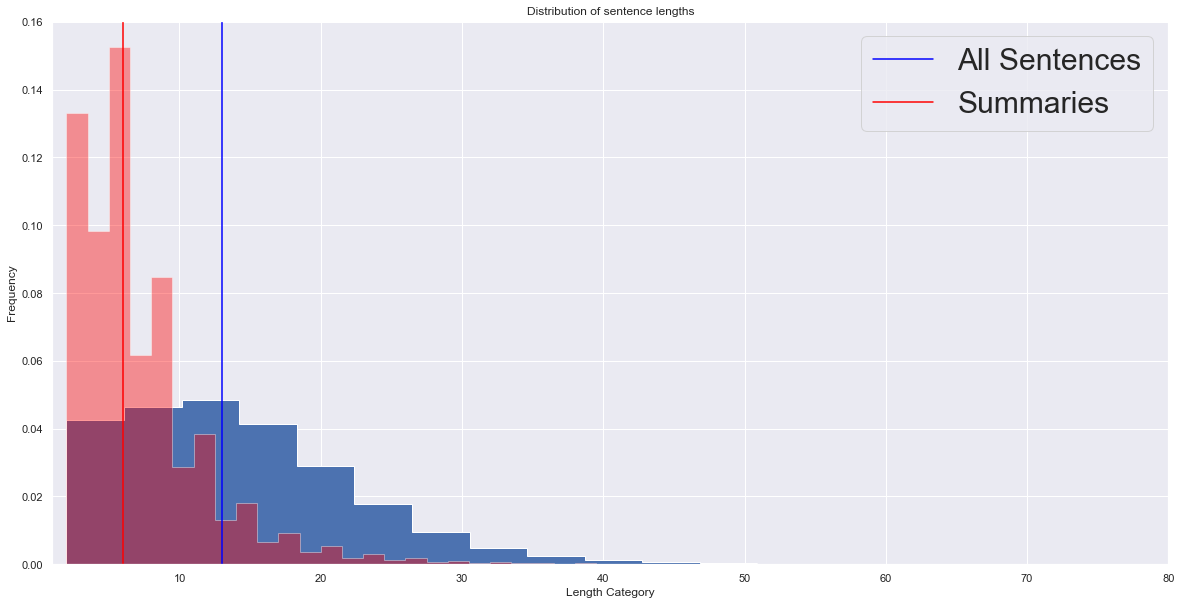

In [14]:
plt.figure(figsize=(20,10))
plt.hist(wikihow['sentence_len'],bins = 250, normed=True,histtype="stepfilled")
plt.hist(only_summaries,bins = 170, normed=True,histtype="stepfilled", color = 'red', alpha = 0.4)
plt.axvline(wikihow['sentence_len'].median(), color = 'blue')
plt.axvline(only_summaries.median(), color = 'red')
plt.xlim((1, 80)) 
plt.xlabel('Length Category')
plt.ylabel('Frequency')
plt.legend(['All Sentences','Summaries'],loc = 'upper right',prop={'size': 30})
plt.title('Distribution of sentence lengths')

When comparing the distributions of `sentence_len` for summary sentences and non summary sentences, we can clearly see the summary sentences are overall shorter than the rest of sentences.

## Content Features
### Computing TF-IDF sentence scores
We will use tf-idf is used here to evaluate how important a sentence is in a document as well as compute the median tf-idf scores for summary sentences vs non-summary sentences. 

In [15]:
#extracting paragraphs
docs = wikihow.groupby('text_id')['sentence'].apply(list)

In [16]:
docs.head()

text_id
0    [Remove the contents from the packaging, Obtai...
1    [Divide your hair into portions, Gather your h...
2                        [Get your Halo trial version]
3    [Motivate yourself to win, Before the race eve...
4    [Choose a pair of jeans that you want to ladde...
Name: sentence, dtype: object

In [17]:
tf_idf_list = []
vectorizer = TfidfVectorizer()
for doc in docs:
    vectors = vectorizer.fit_transform(doc).toarray()
    for vector in vectors:
        tfidf_sent = np.sum(vector)
        tf_idf_list.append(tfidf_sent)
len(tf_idf_list)

7249123

In [18]:
wikihow['tfidf_score'] = tf_idf_list

In [19]:
wikihow.head()

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872
3,176320,"Be it the few words, Twitter allows you or an ...",0,"['Be', 'it', 'the', 'few', 'words,', 'Twitter'...",How to Sell Fine Art Online,21,2.551936
4,176320,Bring out the most salient features of your cr...,0,"['Bring', 'out', 'the', 'most', 'salient', 'fe...",How to Sell Fine Art Online,18,4.182040


In [26]:
wikihow_subset = wikihow[:10000]
med_summary = wikihow_subset[wikihow_subset['is_summary'] == 1]['tfidf_score'].median()
med_no_summary = wikihow_subset[wikihow_subset['is_summary'] == 0]['tfidf_score'].median()
med_summary, med_no_summary

(3.40692961959414, 3.3892789028633685)

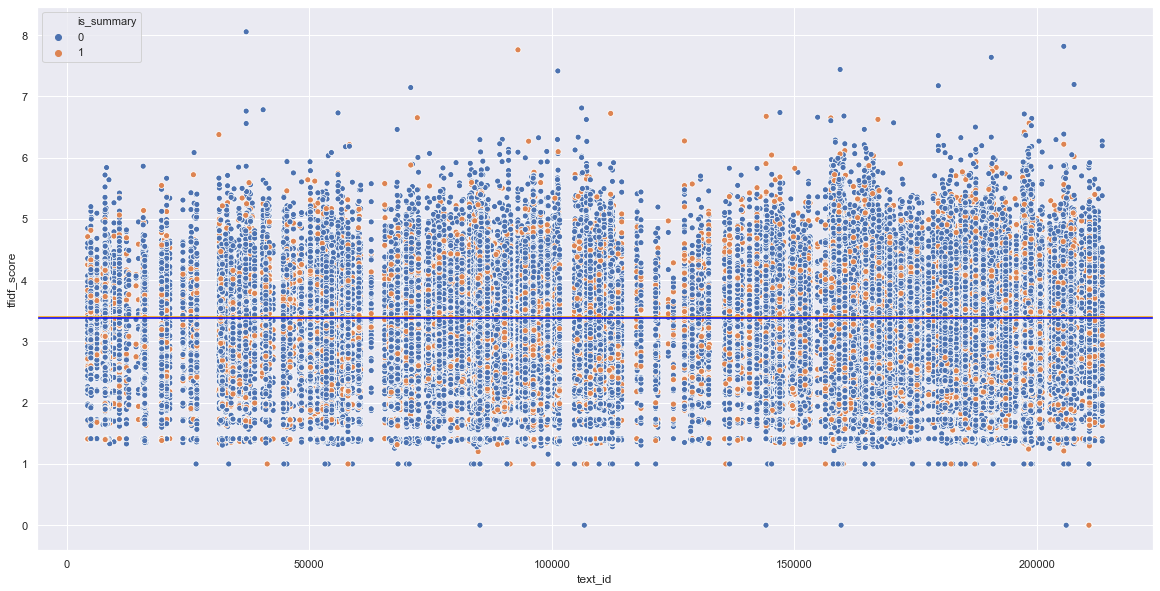

In [69]:
plt.figure(figsize=(20,10))
sns.scatterplot(y = 'tfidf_score', x = 'text_id', data = wikihow_subset, hue = 'is_summary')
plt.axhline(med_summary, color = 'orange')
plt.axhline(med_no_summary, color = 'blue')

Here it looks like sentences with the lowest tf-idf score are the ones that got picked as summary sentences. This can be due to the structure of the wikihow articles where the headline sometimes consists very little words. We will keep in mind that a wikihow article struucture is not representative of what a common text might be.

In [28]:
wikihow.to_csv('./datasets/wikihow_features_v1.csv', index = False)

## Relevance Features 

Another useful feature would be to use similarity to exploit intersentence relationship,for example the degree of similarity between a sentence and a title. The idea here is that sentences related to many other sentences are more relevant.

In [29]:
def get_similarity(term1, term2):
    sent1 = nlp(term1)
    sent2 = nlp(term2)
    return sent1.similarity(sent2)

In [30]:
wikihow_subset = wikihow.iloc[:100000]

In [31]:
wikihow_subset['title_similarity'] = wikihow_subset.apply(lambda x: get_similarity(x['sentence'], x['title']), axis = 1)

In [32]:
wikihow_subset

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score,title_similarity
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904,0.828910
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620,0.806864
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872,0.857768
3,176320,"Be it the few words, Twitter allows you or an ...",0,"['Be', 'it', 'the', 'few', 'words,', 'Twitter'...",How to Sell Fine Art Online,21,2.551936,0.815038
4,176320,Bring out the most salient features of your cr...,0,"['Bring', 'out', 'the', 'most', 'salient', 'fe...",How to Sell Fine Art Online,18,4.182040,0.789926
5,176320,Make it clear to readers why you are an artist...,0,"['Make', 'it', 'clear', 'to', 'readers', 'why'...",How to Sell Fine Art Online,24,4.577154,0.867380
6,176320,"If you re not great with words, find a friend ...",0,"['If', 'you', 're', 'not', 'great', 'with', 'w...",How to Sell Fine Art Online,29,4.299002,0.840578
7,12342,Read the classics before,1,"['Read', 'the', 'classics', 'before']",How to Be Well Read,4,4.168238,0.790482
8,12342,Reading the classics is the very first thing y...,0,"['Reading', 'the', 'classics', 'is', 'the', 'v...",How to Be Well Read,16,3.720692,0.958614
9,12342,If you want to build a solid foundation for yo...,0,"['If', 'you', 'want', 'to', 'build', 'a', 'sol...",How to Be Well Read,33,4.493084,0.919967


In [33]:
wikihow_subset['title_similarity'].max()

0.985295263152068

In [34]:
wikihow_subset['title_similarity'].min()

-0.09509933094643085

In [35]:
def create_buckets(sim):
    if 0 <= sim < 0.25:
        return 'None'
    elif 0.25 <= sim < 0.5:
        return 'Weak'
    elif 0.5 <= sim < 0.70:
        return 'Medium'
    elif 0.70 <= sim < 0.90:
        return 'Strong'
    else:
        return 'Very Strong'
    

In [36]:
wikihow_subset['title_sim_categories'] = wikihow_subset['title_similarity'].apply(create_buckets)

In [37]:
wikihow_subset.head(3)

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score,title_similarity,title_sim_categories
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904,0.828910,Strong
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620,0.806864,Strong
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872,0.857768,Strong


In [38]:
newly_indexed = wikihow_subset.set_index("title_sim_categories") 

In [39]:
newly_indexed

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score,title_similarity
title_sim_categories,,,,,,,,
Strong,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904,0.828910
Strong,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620,0.806864
Strong,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872,0.857768
Strong,176320,"Be it the few words, Twitter allows you or an ...",0,"['Be', 'it', 'the', 'few', 'words,', 'Twitter'...",How to Sell Fine Art Online,21,2.551936,0.815038
Strong,176320,Bring out the most salient features of your cr...,0,"['Bring', 'out', 'the', 'most', 'salient', 'fe...",How to Sell Fine Art Online,18,4.182040,0.789926
Strong,176320,Make it clear to readers why you are an artist...,0,"['Make', 'it', 'clear', 'to', 'readers', 'why'...",How to Sell Fine Art Online,24,4.577154,0.867380
Strong,176320,"If you re not great with words, find a friend ...",0,"['If', 'you', 're', 'not', 'great', 'with', 'w...",How to Sell Fine Art Online,29,4.299002,0.840578
Strong,12342,Read the classics before,1,"['Read', 'the', 'classics', 'before']",How to Be Well Read,4,4.168238,0.790482
Very Strong,12342,Reading the classics is the very first thing y...,0,"['Reading', 'the', 'classics', 'is', 'the', 'v...",How to Be Well Read,16,3.720692,0.958614


In [40]:
#Getting the counts for each bucket
none_sum = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'None')&(wikihow_subset['is_summary'] == 1)]['title_sim_categories'].count()
none = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'None')&(wikihow_subset['is_summary'] == 0)]['title_sim_categories'].count()

weak_sum = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Weak')&(wikihow_subset['is_summary'] == 1)]['title_sim_categories'].count()
weak = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Weak')&(wikihow_subset['is_summary'] == 0)]['title_sim_categories'].count()

medium_sum = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Medium')&(wikihow_subset['is_summary'] == 1)]['title_sim_categories'].count()
medium = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Medium')&(wikihow_subset['is_summary'] == 0)]['title_sim_categories'].count()

strong_sum = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Strong')&(wikihow_subset['is_summary'] == 1)]['title_sim_categories'].count()
strong = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Strong')&(wikihow_subset['is_summary'] == 0)]['title_sim_categories'].count()
very_strong_sum = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Very Strong')&(wikihow_subset['is_summary'] == 1)]['title_sim_categories'].count()
very_strong = wikihow_subset[(wikihow_subset['title_sim_categories'] == 'Very Strong')&(wikihow_subset['is_summary'] == 0)]['title_sim_categories'].count()

In [41]:
none

64

In [42]:
counts_cat_dict_sum = {'None':none_sum, 'Weak': weak_sum, 'Medium': medium_sum, 'Strong': strong_sum, 'Very Strong': very_strong_sum}
counts_cat_dict = {'None':none, 'Weak': weak, 'Medium': medium, 'Strong': strong, 'Very Strong': very_strong}

In [43]:
sum_df = pd.DataFrame(list(counts_cat_dict_sum.items()))
sum_df.columns =["Category","Count"]
is_sum_list = [1] * len(counts_cat_dict_sum)
is_summary_df = pd.DataFrame(is_sum_list, columns = ['is_summary'])
full_sum_df = sum_df.join(is_summary_df)
full_sum_df

,Category,Count,is_summary
0,None,12,1
1,Weak,1044,1
2,Medium,6730,1
3,Strong,8559,1
4,Very Strong,238,1


In [44]:
no_sum_df = pd.DataFrame(list(counts_cat_dict.items()))
no_sum_df.columns =["Category","Count"]
is_sum_list = [0] * len(counts_cat_dict)
is_not_summary_df = pd.DataFrame(is_sum_list, columns = ['is_summary'])
full_not_sum_df = no_sum_df.join(is_not_summary_df)
full_not_sum_df

,Category,Count,is_summary
0,None,64,0
1,Weak,992,0
2,Medium,12231,0
3,Strong,67053,0
4,Very Strong,3077,0


In [45]:
#Concatenate both dataframes
frames = [full_sum_df, full_not_sum_df] 
full_frame = pd.concat(frames)
full_frame

,Category,Count,is_summary
0,None,12,1
1,Weak,1044,1
2,Medium,6730,1
3,Strong,8559,1
4,Very Strong,238,1
0,None,64,0
1,Weak,992,0
2,Medium,12231,0
3,Strong,67053,0
4,Very Strong,3077,0


In [46]:
frequencies = []
total_none = 82
total_weak = 270 + 1780
total_medium = 1889 + 17069
total_strong= 2695 + 72900
total_very_strong =105 + 3210
frequencies.append(float(full_frame[(full_frame['Category']== 'None')&(full_frame['is_summary']== 1)]['Count']/total_none))
frequencies.append(float(full_frame[(full_frame['Category']== 'Weak')&(full_frame['is_summary']== 1)]['Count']/total_weak))
frequencies.append(float(full_frame[(full_frame['Category']== 'Medium')&(full_frame['is_summary']== 1)]['Count']/total_medium))
frequencies.append(float(full_frame[(full_frame['Category']== 'Strong')&(full_frame['is_summary']== 1)]['Count']/total_strong))
frequencies.append(float(full_frame[(full_frame['Category']== 'Very Strong')&(full_frame['is_summary']== 1)]['Count']/total_very_strong))
frequencies.append(float(full_frame[(full_frame['Category']== 'None')&(full_frame['is_summary']== 0)]['Count']/total_none))
frequencies.append(float(full_frame[(full_frame['Category']== 'Weak')&(full_frame['is_summary']== 0)]['Count']/total_weak))
frequencies.append(float(full_frame[(full_frame['Category']== 'Medium')&(full_frame['is_summary']== 0)]['Count']/total_medium))
frequencies.append(float(full_frame[(full_frame['Category']== 'Strong')&(full_frame['is_summary']== 0)]['Count']/total_strong))
frequencies.append(float(full_frame[(full_frame['Category']== 'Very Strong')&(full_frame['is_summary']== 0)]['Count']/total_very_strong))

full_frame['frequencies'] = frequencies

In [47]:
full_frame

,Category,Count,is_summary,frequencies
0,None,12,1,0.146341
1,Weak,1044,1,0.509268
2,Medium,6730,1,0.354995
3,Strong,8559,1,0.113222
4,Very Strong,238,1,0.071795
0,None,64,0,0.780488
1,Weak,992,0,0.483902
2,Medium,12231,0,0.645163
3,Strong,67053,0,0.887003
4,Very Strong,3077,0,0.928205


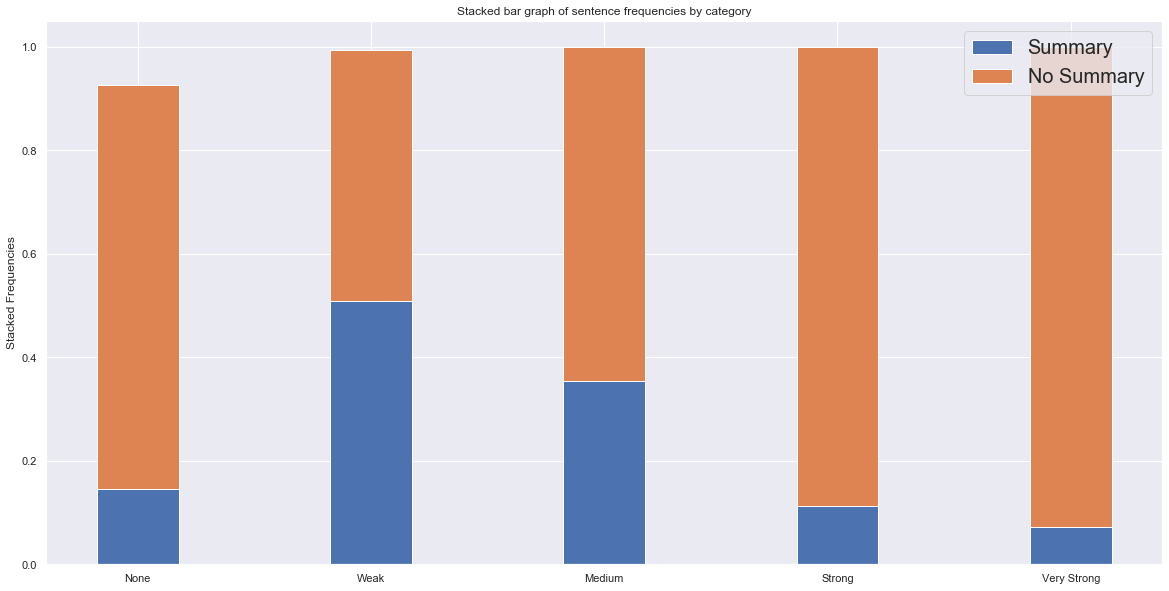

In [48]:
#Creating a stacked bar graph
summary = full_frame[full_frame['is_summary']==1]
no_summary = full_frame[full_frame['is_summary']==0]
N = 5
ind = np.arange(N)
width = 0.35
plt.figure(figsize=(20,10))
p1 = plt.bar(ind,summary['frequencies'] , width)
p2 = plt.bar(ind, no_summary['frequencies'], width, bottom=summary['frequencies'])

plt.ylabel('Stacked Frequencies')
plt.title('Stacked bar graph of sentence frequencies by category')
plt.xticks(ind, ('None', 'Weak', 'Medium', 'Strong', 'Very Strong'))
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Summary', 'No Summary'), prop={'size': 20}, loc = 'upper right')



Here we can see that in proportion, non summary sentences show more similarity to the title than summary sentences. As we progress towards stronger similarities, the proportion of summary sentences decreases, this can be because these sentences are generally shorter so they might include less elements similar to the title than longer sentences like non summary sentences.

## Most frequent words in a summary
From sentences with highest tf-idf score, we will pick the top most important words

In [49]:
#Create stop_word list
stop_words = set(stopwords.words('english'))

In [50]:
word_list = []
for sentence in wikihow_subset['sentence']:
    words = sentence.split(' ')
    for word in words:
        if word.lower() not in stop_words:
            word_list.append(word.lower())

In [51]:
counts = Counter(word_list)

In [53]:
#Let's pick the 20 most common words (stop words excluded)
most_common = counts.most_common()
most_common

[('may', 8314),
 ('help', 5354),
 ('also', 5149),
 ('use', 4864),
 ('doctor', 4649),
 ('make', 4256),
 ('get', 3779),
 ('skin', 3511),
 ('water', 3403),
 ('take', 3212),
 ('try', 3146),
 ('one', 2886),
 ('like', 2780),
 ('time', 2701),
 ('body', 2676),
 ('need', 2620),
 ('teeth', 2520),
 ('blood', 2442),
 ('day', 2435),
 ('avoid', 2360),
 ('sure', 2351),
 ('keep', 2339),
 ('pain', 2190),
 ('baby', 2172),
 ('cause', 2161),
 ('feel', 1872),
 ('people', 1817),
 ('want', 1814),
 ('symptoms', 1811),
 ('even', 1738),
 ('using', 1731),
 ('pregnancy', 1694),
 ('many', 1604),
 ('treatment', 1600),
 ('ask', 1581),
 ('foods', 1579),
 ('might', 1566),
 ('mouth', 1551),
 ('see', 1545),
 ('apply', 1536),
 ('good', 1509),
 ('reduce', 1500),
 ('area', 1499),
 ('back', 1473),
 ('find', 1463),
 ('two', 1450),
 ('well', 1444),
 ('risk', 1402),
 ('work', 1391),
 ('go', 1372),
 (',', 1371),
 ('include', 1371),
 ('around', 1322),
 ('important', 1311),
 ('health', 1310),
 ('used', 1304),
 ('eat', 1298),
 ('e

In [54]:
top_occurences = ['may','help','use','get', 'make','like','need', 'take', 'try', 
                  'avoid','keep', 'want', 'many', 'ask', 'good', 'find', 'work', 
                  'go', 'include', 'important', 'know']
len(top_occurences)

21

In [55]:
def check_word(sentence, occurence):
    words = sentence.split(' ')
    for word in words:
        if word.lower() == occurence:
            return 1
        else:
            return 0


In [56]:
for occurence in top_occurences:
    wikihow_subset[occurence] = wikihow_subset['sentence'].apply(lambda x: check_word(x, occurence))

In [57]:
wikihow_subset.head(3)

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score,title_similarity,title_sim_categories,may,...,want,many,ask,good,find,work,go,include,important,know
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904,0.828910,Strong,0,...,0,0,0,0,0,0,0,0,0,0
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620,0.806864,Strong,0,...,0,0,0,0,0,0,0,0,0,0
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872,0.857768,Strong,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
wikihow_subset['help'].mean()

0.00058

In [59]:
#Calculating means of 0-1 for summary category and non summary category
occurence_means_summary = dict()
occurence_means_no_summary = dict()
for occurence in top_occurences:
    mean_summary = wikihow_subset[wikihow_subset['is_summary']==1][occurence].mean()
    occurence_means_summary[occurence] = mean_summary
    
    mean_no_summary = wikihow_subset[wikihow_subset['is_summary']==0][occurence].mean()
    occurence_means_no_summary[occurence] = mean_no_summary

In [60]:
summary_mean = pd.DataFrame(occurence_means_summary.items(), columns = ['word','mean'])

In [61]:
no_summary_mean = pd.DataFrame(occurence_means_no_summary.items(), columns = ['word','mean'])

In [62]:
#Create a dataframe by mean of words 
means_sum = pd.DataFrame.from_dict(occurence_means_summary, orient='index', columns = ['summary'])
means_no_sum = pd.DataFrame.from_dict(occurence_means_no_summary, orient='index', columns = ['non_summary'])
full_word_means= means_sum.join(means_no_sum)
full_word_means.head()

,summary,non_summary
may,0.000000,0.000024
help,0.001869,0.000324
use,0.051257,0.010717
get,0.032986,0.002218
make,0.017126,0.012084


In [63]:
#Create a frequency columns
full_word_means['total'] = full_word_means['summary'] + full_word_means['non_summary']
full_word_means['summary'] = full_word_means['summary']/full_word_means['total']
full_word_means['non_summary'] = full_word_means['non_summary']/full_word_means['total']
full_word_means.loc['important'] = 0
full_word_means

,summary,non_summary,total
may,0.000000,1.000000,0.000024
help,0.852409,0.147591,0.002193
use,0.827070,0.172930,0.061975
get,0.937001,0.062999,0.035203
make,0.586308,0.413692,0.029210
like,0.000000,1.000000,0.000959
need,0.000000,1.000000,0.000012
take,0.844675,0.155325,0.042835
try,0.719559,0.280441,0.046679
avoid,0.803954,0.196046,0.037729


<Figure size 1440x720 with 0 Axes>

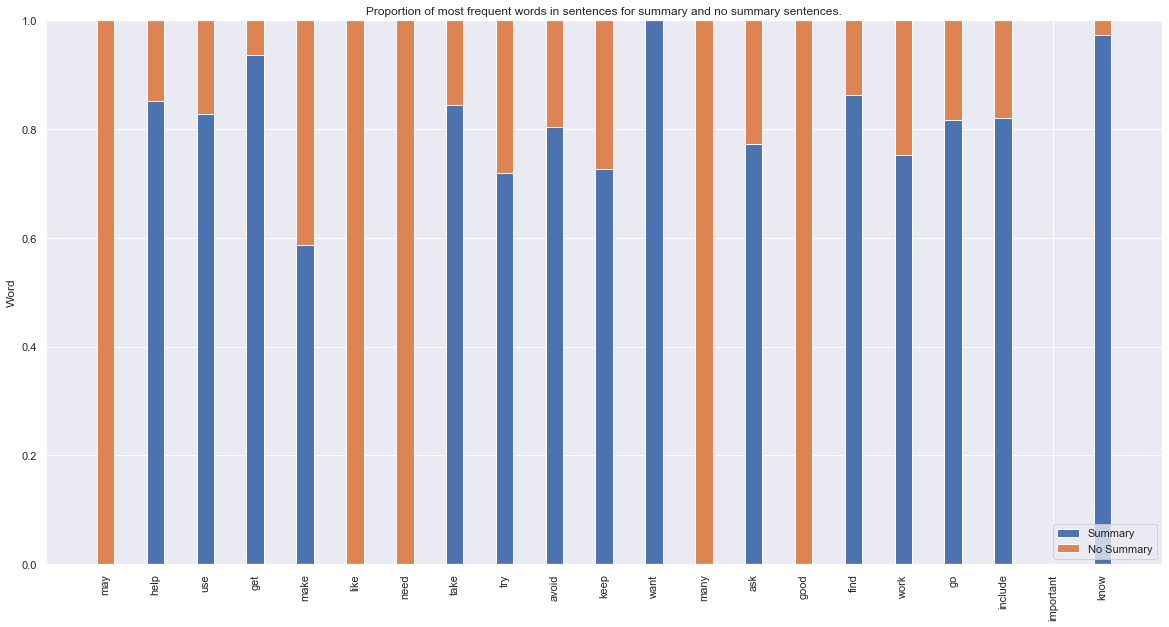

In [66]:
N = 5
labels = top_occurences
x = np.arange(len(labels))
width = 0.35
plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
p1 = plt.bar(x ,full_word_means['summary'] , width, label='Summary')
p2 = plt.bar(x, full_word_means['non_summary'], width, bottom=full_word_means['summary'], label='No Summary')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Word')
ax.set_title('Proportion of most frequent words in sentences for summary and no summary sentences.')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()


It looks like some of the most frequent words are more present in summary sentences than others.

In [67]:
wikihow.to_csv('./datasets/wikihow_sep_features.csv', index= False)
wikihow_subset.to_csv('./datasets/wikihow_sep_subset.csv', index= False)

In [68]:
wikihow_subset.head(20)

,text_id,sentence,is_summary,words,title,sentence_len,tfidf_score,title_similarity,title_sim_categories,may,...,want,many,ask,good,find,work,go,include,important,know
0,176320,Sell yourself first,1,"['Sell', 'yourself', 'first']",How to Sell Fine Art Online,3,2.208904,0.828910,Strong,0,...,0,0,0,0,0,0,0,0,0,0
1,176320,"Before doing anything else, stop and sum up yo...",0,"['Before', 'doing', 'anything', 'else,', 'stop...",How to Sell Fine Art Online,12,4.242620,0.806864,Strong,0,...,0,0,0,0,0,0,0,0,0,0
2,176320,"Now, think about how to translate that to an o...",0,"['Now,', 'think', 'about', 'how', 'to', 'trans...",How to Sell Fine Art Online,11,2.700872,0.857768,Strong,0,...,0,0,0,0,0,0,0,0,0,0
3,176320,"Be it the few words, Twitter allows you or an ...",0,"['Be', 'it', 'the', 'few', 'words,', 'Twitter'...",How to Sell Fine Art Online,21,2.551936,0.815038,Strong,0,...,0,0,0,0,0,0,0,0,0,0
4,176320,Bring out the most salient features of your cr...,0,"['Bring', 'out', 'the', 'most', 'salient', 'fe...",How to Sell Fine Art Online,18,4.182040,0.789926,Strong,0,...,0,0,0,0,0,0,0,0,0,0
5,176320,Make it clear to readers why you are an artist...,0,"['Make', 'it', 'clear', 'to', 'readers', 'why'...",How to Sell Fine Art Online,24,4.577154,0.867380,Strong,0,...,0,0,0,0,0,0,0,0,0,0
6,176320,"If you re not great with words, find a friend ...",0,"['If', 'you', 're', 'not', 'great', 'with', 'w...",How to Sell Fine Art Online,29,4.299002,0.840578,Strong,0,...,0,0,0,0,0,0,0,0,0,0
7,12342,Read the classics before,1,"['Read', 'the', 'classics', 'before']",How to Be Well Read,4,4.168238,0.790482,Strong,0,...,0,0,0,0,0,0,0,0,0,0
8,12342,Reading the classics is the very first thing y...,0,"['Reading', 'the', 'classics', 'is', 'the', 'v...",How to Be Well Read,16,3.720692,0.958614,Very Strong,0,...,0,0,0,0,0,0,0,0,0,0
9,12342,If you want to build a solid foundation for yo...,0,"['If', 'you', 'want', 'to', 'build', 'a', 'sol...",How to Be Well Read,33,4.493084,0.919967,Very Strong,0,...,0,0,0,0,0,0,0,0,0,0
